## Import the required libraries

In [16]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib
%matplotlib inline

## Do my requests and create my soup

In [17]:
url = 'https://www.imdb.com/search/title/?genres=drama&groups=top_250&sort=user_rating,desc'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

## Extract all the movies

In [18]:
movies = soup.find_all(class_='lister-item')

In [19]:
len(movies)

50

## Get the data of the first movie before looping over all movies

In [20]:
first_movie = movies[0]

## Getting the title

In [21]:
title = first_movie.find(class_='lister-item-header').find('a').string
print(title)

Joker


## Getting the rating

In [22]:
rating = float(first_movie.find(class_='ratings-imdb-rating').find('strong').string)
print(rating)

9.4


## Getting the duration

In [23]:
duration = int(first_movie.find(class_='runtime').string.strip(' min'))
print(duration)

121


## Creating a dictionary to hold all the data and looping over all movies

In [24]:
movies_dict = {
    'Title': [],
    'Rating': [],
    'Duration': []
}

for movie in movies:
    title = movie.find(class_='lister-item-header').find('a').string
    rating = float(movie.find(class_='ratings-imdb-rating').find('strong').string)
    duration = int(movie.find(class_='runtime').string.strip(' min'))
    movies_dict['Title'].append(title)
    movies_dict['Rating'].append(rating)
    movies_dict['Duration'].append(duration)

## Creating a dataframe out of the extracted data

In [25]:
movies_df = pd.DataFrame.from_dict(movies_dict)
movies_df.head()

,Title,Rating,Duration
0,Joker,9.4,121
1,Les évadés,9.3,142
2,Le parrain,9.2,175
3,The Dark Knight: Le chevalier noir,9.0,152
4,"Le parrain, 2ème partie",9.0,202


## Analyzing the data

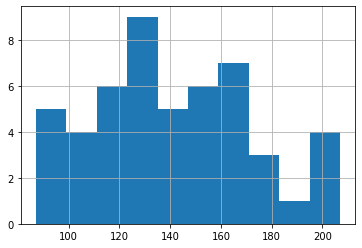

In [26]:
movies_df['Duration'].hist()

In [27]:
import xlwings as xw
book = xw.Book()
sheet = book.sheets['Sheet1']
sheet.range('A1').value = movies_df

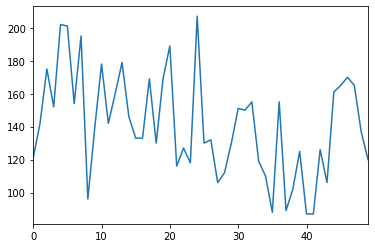

In [28]:
movies_df['Duration'].plot()

<Picture 'duration variation' in <Sheet [Book1]Sheet1>>

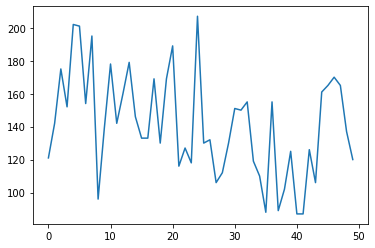

In [29]:
import matplotlib.pyplot as plt

figure = plt.figure()
plt.plot(movies_df['Duration'])

sheet.pictures.add(figure, name='duration variation')